In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from os import makedirs,path
from errno import EEXIST

import pandas as pd
from datetime import datetime, timezone, date

In [ ]:
def mkdir_p(mypath):
    # Creates a directory: same as mkdir or fulltime(path)
    try:
        makedirs(mypath)
    except OSError as exc:
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise




# Creating directory for a path

#filename = 'Figures/VariableSweeps/h={h}/Ni={Ni}/N={N}/rhos={rhos}/rhot={rhot}/rhob={rhob}'.format(h=h, Ni=Ni, N=N, rhos=rhos, rhot=rhot, rhob=rhob) #path for fig save

now = datetime.now()


datestring = now.strftime('%Y_%m_%d')
timestring= now.strftime("%H_%M")




fulltime = datetime.today().strftime('%Y-%m-%d/%H_%M')

filename = '/content/gdrive/MyDrive/Output/{fulltime}'.format(fulltime=fulltime) #path for fig save

mkdir_p(filename)

In [ ]:
filename

'/content/gdrive/MyDrive/Output/2024-07-11/15_15'

In [ ]:

#=============================================================================
# Physical Constants Exp. Data


dt = 0.05

R0 = 5.4 #xend value



A = 0.641




rhos = 1.352

rhob = 1.32
rhot = 1.317


mu = 4.773326883

# expno = 1

g = 981.0



K = (1-2.10444*(A / R0)+2.08877*(A/R0)**3)




frtd = 4.0/3.0
hf = 0.5
thd = 1/3.0
sxth = 1/6.0
twonths = 2.0/9.0
svnhf = 7.0/ 2.0


oneoversixmuA = 1.0/ (6.0*np.pi*mu*A)
govereightpimu = g / (8.0*np.pi*mu)

In [ ]:
rhosrhob = rhos-rhob


rhobrhot = rhob-rhot
print('rhob-rhot=', rhobrhot)
print('rhos-rhob=', rhosrhob)


rhob-rhot= 0.0030000000000001137
rhos-rhob= 0.03200000000000003


In [ ]:
lightblue = '#89B3D1'
mediumblue = '#1F77B4'
darkblue = '#0A4A7A'

In [ ]:
time_df = pd.read_csv('t_array.txt', dtype=float)

sphvels_df = pd.read_csv('sphvels.txt', dtype=float)

X_df = pd.read_csv('dataX.txt', dtype=float)

Y_df = pd.read_csv('dataY.txt', dtype=float)

yend_df = pd.read_csv('yend_array.txt', dtype=float)

In [ ]:
len(sphvels_df)

1118

In [ ]:
V_TermTop =  (2*A**2 *g)/(9*mu)*(rhot-rhos)
V_TermBttm = (2*A**2 *g)/(9*mu)*(rhob-rhos)

V_TermTopk =  (2*A**2 *g)/(9*mu)*(rhot-rhos)*K
V_TermBttmk = (2*A**2 *g)/(9*mu)*(rhob-rhos)*K


In [ ]:
print('Terminal Velocity Top: ', -V_TermTop)
print('Terminal Velocity Bottom: ', -V_TermBttm)

Terminal Velocity Top:  0.6567792457636328
Terminal Velocity Bottom:  0.6004838818410339


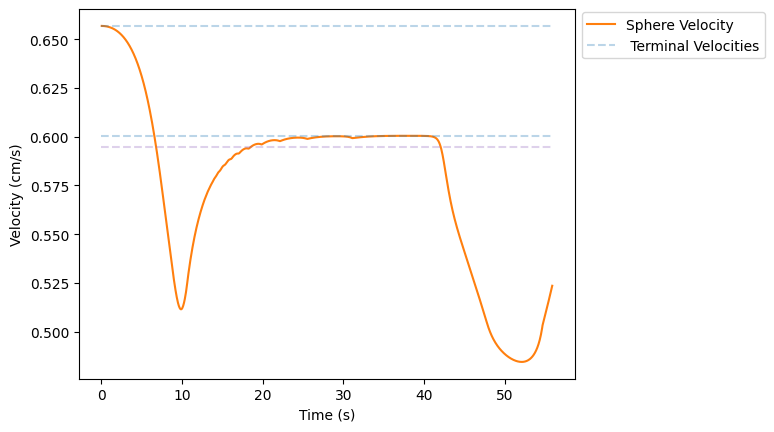

In [ ]:
##

plt1, axes = plt.subplots()


#plt.title('Sphere Velocity vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')


plt.plot(time_df, sphvels_df, color='tab:orange', label = 'Sphere Velocity')

plt.hlines(y= -V_TermTop,  xmin=0, xmax=len(time_df)*dt, color='tab:blue', linestyle='dashed', alpha=0.3, label = r' Terminal Velocities')
plt.hlines(y= -V_TermBttm,  xmin=0, xmax=len(time_df)*dt, color='tab:blue', linestyle='dashed', alpha=0.3)


plt.hlines(y=-cst1*V_TermBttm,  xmin=0, xmax=len(time_df)*dt, color='tab:purple', linestyle='dashed', alpha=0.3)


plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1.01))



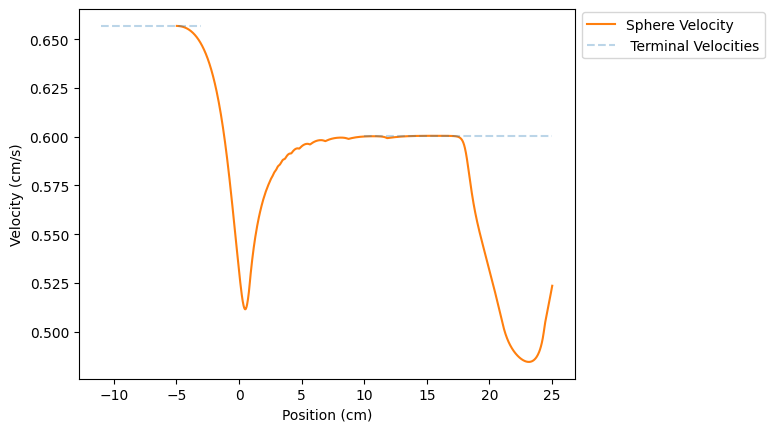

In [ ]:

##

plt2, axes = plt.subplots()


#plt.title('Sphere Velocity vs. Time')
plt.xlabel('Position (cm)')
plt.ylabel('Velocity (cm/s)')


plt.plot(yend_df, sphvels_df, color='tab:orange', label = 'Sphere Velocity')

plt.hlines(y=-V_TermTop,  xmin=-11, xmax=-3, color='tab:blue', linestyle='dashed', alpha=0.3, label = r' Terminal Velocities')
plt.hlines(y=-V_TermBttm,  xmin=10, xmax=25, color='tab:blue', linestyle='dashed', alpha=0.3)

# plt.vlines(x=-A,  ymin=0.208, ymax=0.20875, color='tab:pink', linestyle='dashed', alpha=0.3, label = r' $\pm A$')
# plt.vlines(x=A,  ymin=0.208, ymax=0.20875, color='tab:pink', linestyle='dashed', alpha=0.3)


plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1.01))



In [ ]:
-V_TermTop*0.9

0.5911013211872695

In [ ]:
cst = 0.99

In [ ]:
time_df

,0.0
0,0.05
1,0.10
2,0.15
3,0.20
4,0.25
...,...
1113,55.70
1114,55.75
1115,55.80
1116,55.85


In [ ]:
time_df.shape

(1118, 1)

In [ ]:

# Residence Time

#firsttime = 1.0*(( sphvels_df < -V_TermTop) & (sphvels_df < -cst*V_TermBttm ))

firsttime = 1.0*(( sphvels_df < -V_TermTop) & (sphvels_df < -cst*V_TermBttm ) )



firsttime_indicies = np.where(firsttime)[0]



t0_index = firsttime_indicies[0]
tf_index = firsttime_indicies[-1]

t0 = time_df.iloc[t0_index][0]
tf = time_df.iloc[tf_index][0]


print('t0:', t0)
print('tf:', tf)

residencetime = abs(t0-tf)


print('residence time:', residencetime)


t0: 6.8500000000000005
tf: 18.633333333333336
residence time: 11.783333333333335


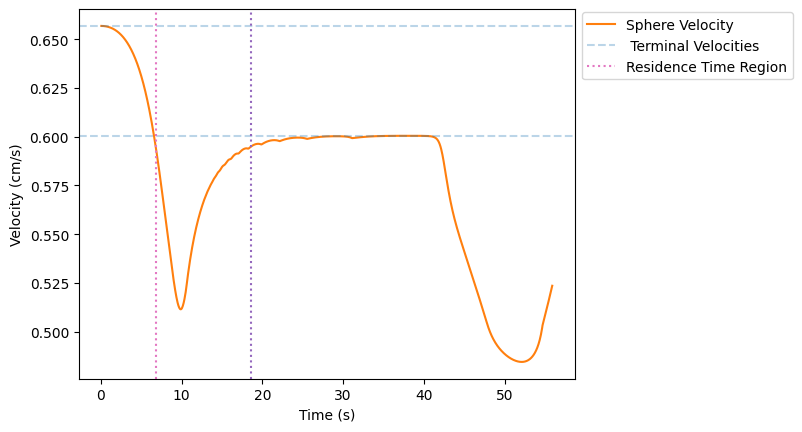

In [ ]:
plt1, axes = plt.subplots()


#plt.title('Sphere Velocity vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (cm/s)')


plt.plot(time_df, sphvels_df, color='tab:orange', label = 'Sphere Velocity')

plt.axhline(y= -V_TermTop, color='tab:blue', linestyle='dashed', alpha=0.3, label = r' Terminal Velocities')
plt.axhline(y= -V_TermBttm,  color='tab:blue', linestyle='dashed', alpha=0.3)

plt.axvline(x=t0, color='tab:pink', ls='dotted', label='Residence Time Region')
plt.axvline(x=tf, color='tab:purple', ls='dotted')

plt.legend(loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1.01))



In [ ]:
t0_index

136

In [ ]:
tf_index

1117

In [ ]:
Y_df.iloc[t0_index][-1]

-1.0369717393017996

In [ ]:
X_df.iloc[t0_index][-1]

5.138848289206334

In [ ]:
lineweight = 1.0

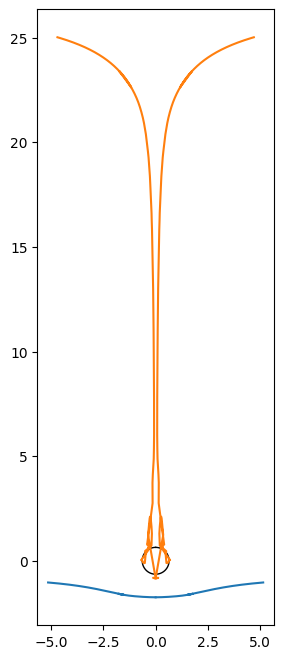

In [ ]:
fig, ax = plt.subplots(figsize=(8,8), sharex=True, sharey=False)


sphx = np.linspace(0,A, 100)
sphyp = np.sqrt(A**2- sphx**2)
sphym = - sphyp
ax.plot(sphx, sphyp, 'k', label ='Sphere', lw=lineweight)
ax.plot(sphx, sphym, 'k', -sphx, -sphyp, 'k', -sphx, sphyp, 'k', lw = lineweight)


ax.plot(X_df.iloc[t0_index], Y_df.iloc[t0_index], color='tab:blue')
ax.plot(-X_df.iloc[t0_index], Y_df.iloc[t0_index], color='tab:blue')



ax.plot(X_df.iloc[tf_index], Y_df.iloc[tf_index], color='tab:orange')
ax.plot(-X_df.iloc[tf_index], Y_df.iloc[tf_index], color='tab:orange')



ax.set_aspect('equal', adjustable='box')



In [ ]:
distance = abs(Y_df.iloc[t0_index][-1]-Y_df.iloc[tf_index][-1])

distance

26.053844107785153


$t$  ||   $z_n$ ||  $V_s(z_n(t))$

--


Pseudocode:

    Fix $t_i$ between $t_0$ and $t_f$:
    
        Get $z_n(t_i)$

            Get $V_s(z_n(t_i))$






In [ ]:
zn_array = []
L_array = []

for t in range(t0_index,tf_index, 1):

  zn = Y_df.iloc[t][-1]
  #print(r'z_n(t)=', Y_df.iloc[t][-1])

  #print(r'Distance from initial (R_0, z_n(t_0))=', abs(Y_df.iloc[t0_index][-1]-Y_df.iloc[t][-1]))

  L  = abs(Y_df.iloc[t0_index][-1]-Y_df.iloc[t][-1])


  zn_array.append(zn)

  L_array.append(L)


In [ ]:
len(L_array)

981

In [ ]:
np.savetxt('{}/L_array.txt'.format(filename), L_array, delimiter=',', fmt='%s')

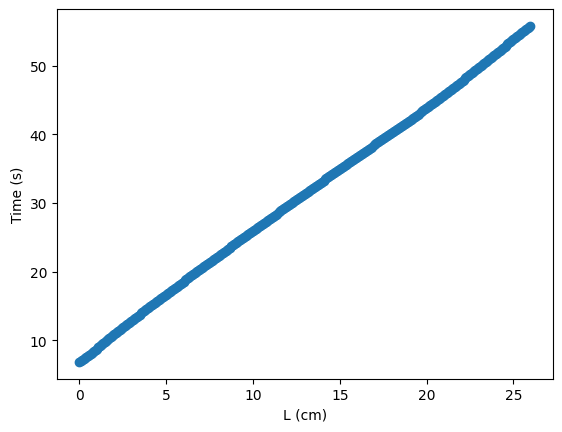

In [ ]:
time = np.linspace(t0, tf, len(L_array))

plt.xlabel('L (cm)')
plt.ylabel('Time (s)')

n = 3 # plot  every n points
plt.scatter(L_array[::n], time[::n])



In [ ]:
# print('A=', A,', rhob=', rhob, ', t0=', t0, ', tf=', tf, ', Residence Time: ', residencetime, ', Distance Travelled:', distance)

# print('rhos-rhob=', rhosrhob)
# print('rhob-rhot=', rhobrhot)

In [ ]:
print('A=', A, 't0=', t0, ', tf=', tf, ', Residence Time: ', residencetime)

print('rhos-rhob=', rhosrhob)
print('rhob-rhot=', rhobrhot)

A= 0.641 t0= 6.8500000000000005 , tf= 55.900000000000006 , Residence Time:  49.050000000000004
rhos-rhob= 0.03200000000000003
rhob-rhot= 0.0030000000000001137
